## Importando o database
1) Entendendo o contexto
Não sabia sobre os materiais e nem sobre o processo 

2) Objetivo
    - predizer a quantidade de silica (impureza) está no minerio concentrado

    - Reduzir a quantidade de minerio nas tailings (rejeitos, tipo de descarte em que não ha possibilidade de reciclagem)


Iron Feed | Silica feed

qualidade do mineiro antes de ir para instalacao de flotacao.
flotacao : proceso que separa mistura heterogenea, que nao se dissolvem entre si
misturas heterogeneas: mistura que é possivel distinguir seus materiais

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/raw/MiningProcess_Flotation_Plant_Database.csv",decimal=',')
df.head()


ModuleNotFoundError: No module named 'pandas'

In [3]:
df.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
737452,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


### Informações do tipo de dado e contagem de dados nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

### MEDIA DAS 2 COLUNAS PRINCIPAIS | Quantitativas
### MEDIA- DESVIO PADRAO - MIN - Q1 - Q2 - Q3 - MAX


Podemos reparar que a quantidade de ferro aumentou durante o tempo, tal qual silica, oque pode nao ser o ideal. Para melhorar a qualidade, a pureza do ferro deveria subir e o de silica diminuir ou se manter. Oque nao acontece, surge a demanda da solução


In [5]:
df.iloc[:,1:3].describe()

,% Iron Feed,% Silica Feed
count,737453.000000,737453.000000
mean,56.294739,14.651716
std,5.157744,6.807439
min,42.740000,1.310000
25%,52.670000,8.940000
50%,56.080000,13.850000
75%,59.720000,19.600000
max,65.780000,33.400000


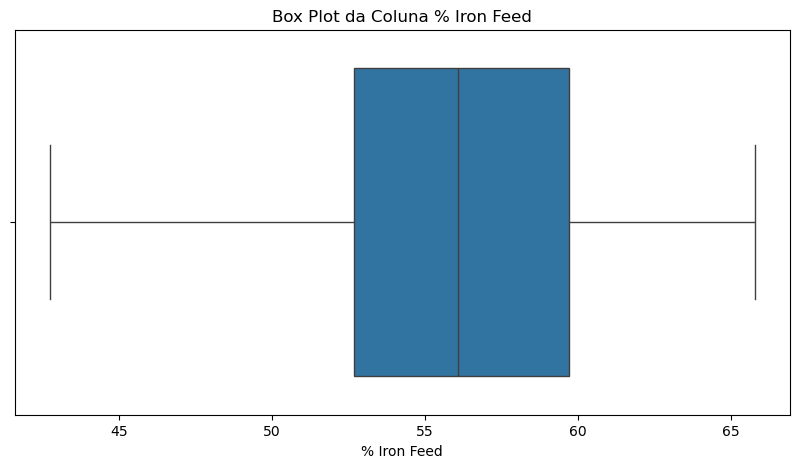

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='% Iron Feed')
plt.title('Box Plot da Coluna % Iron Feed')
plt.xlabel('% Iron Feed')
plt.show()


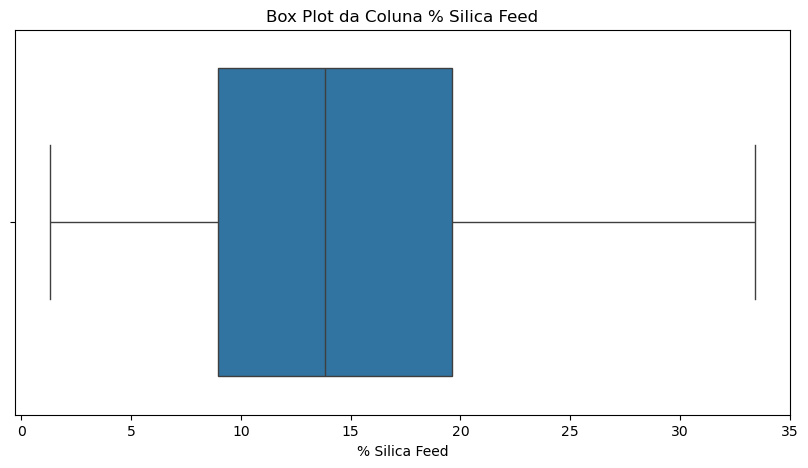

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='% Silica Feed')
plt.title('Box Plot da Coluna % Silica Feed')
plt.xlabel('% Silica Feed')
plt.show()


In [7]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


Starch flow | Amina flow | Ore pulp flow | Ore pulp ph | Ore pulp density

Colunas mais importantes para impactar a qualidade dos minerios

In [16]:
df.iloc[:,3:7].describe()

,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density
count,737453.000000,737453.000000,737453.000000,737453.000000
mean,488.144697,397.578372,9.767639,1.680380
std,91.230534,9.699785,0.387007,0.069249
min,241.669000,376.249000,8.753340,1.519820
25%,431.796000,394.264000,9.527360,1.647310
50%,504.393000,399.249000,9.798100,1.697600
75%,553.257000,402.968000,10.038000,1.728330
max,739.538000,418.641000,10.808100,1.853250


Ore pulp flow - O DP está muito alto

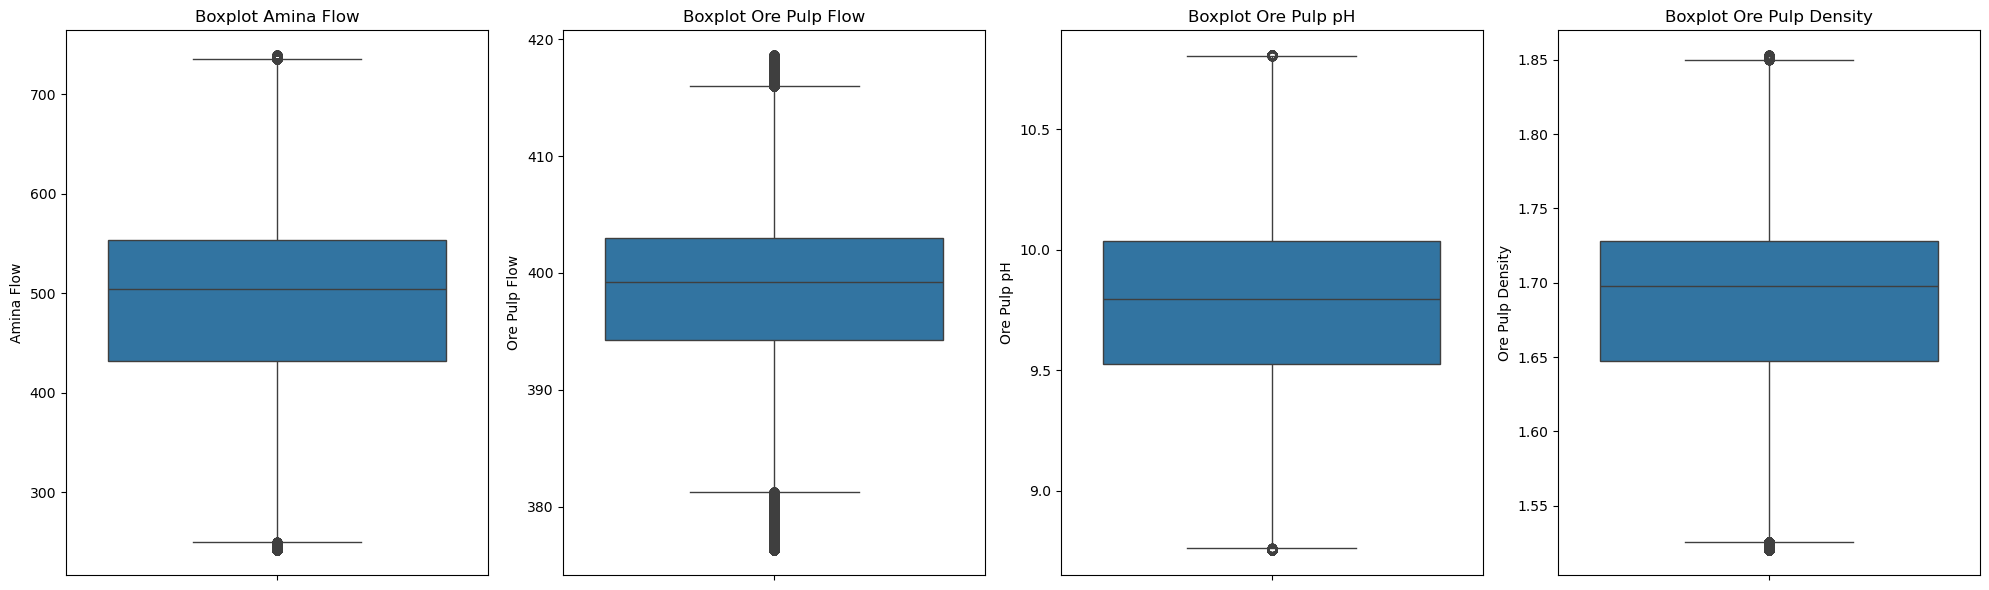

In [17]:
cols_plot = df.columns[3:7]

fig, axes = plt.subplots(nrows=1, ncols=len(cols_plot), figsize=(20,6))

for i, col in enumerate(cols_plot):
    sns.boxplot(data=df,y=col,ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Bastente outliers, principalmente em Ore Pulp flow, pode ser interfiram no resultado final \
PH - em alguns momentos foram medidos baixos e altos phs, possivel interferencia no processo


Foltation Column (Air flow)(Ar dentro do conteiner)(Level)() 

In [9]:
df.iloc[:,8:22].describe()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231
std,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491
min,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000
25%,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000
50%,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000
75%,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000
max,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000


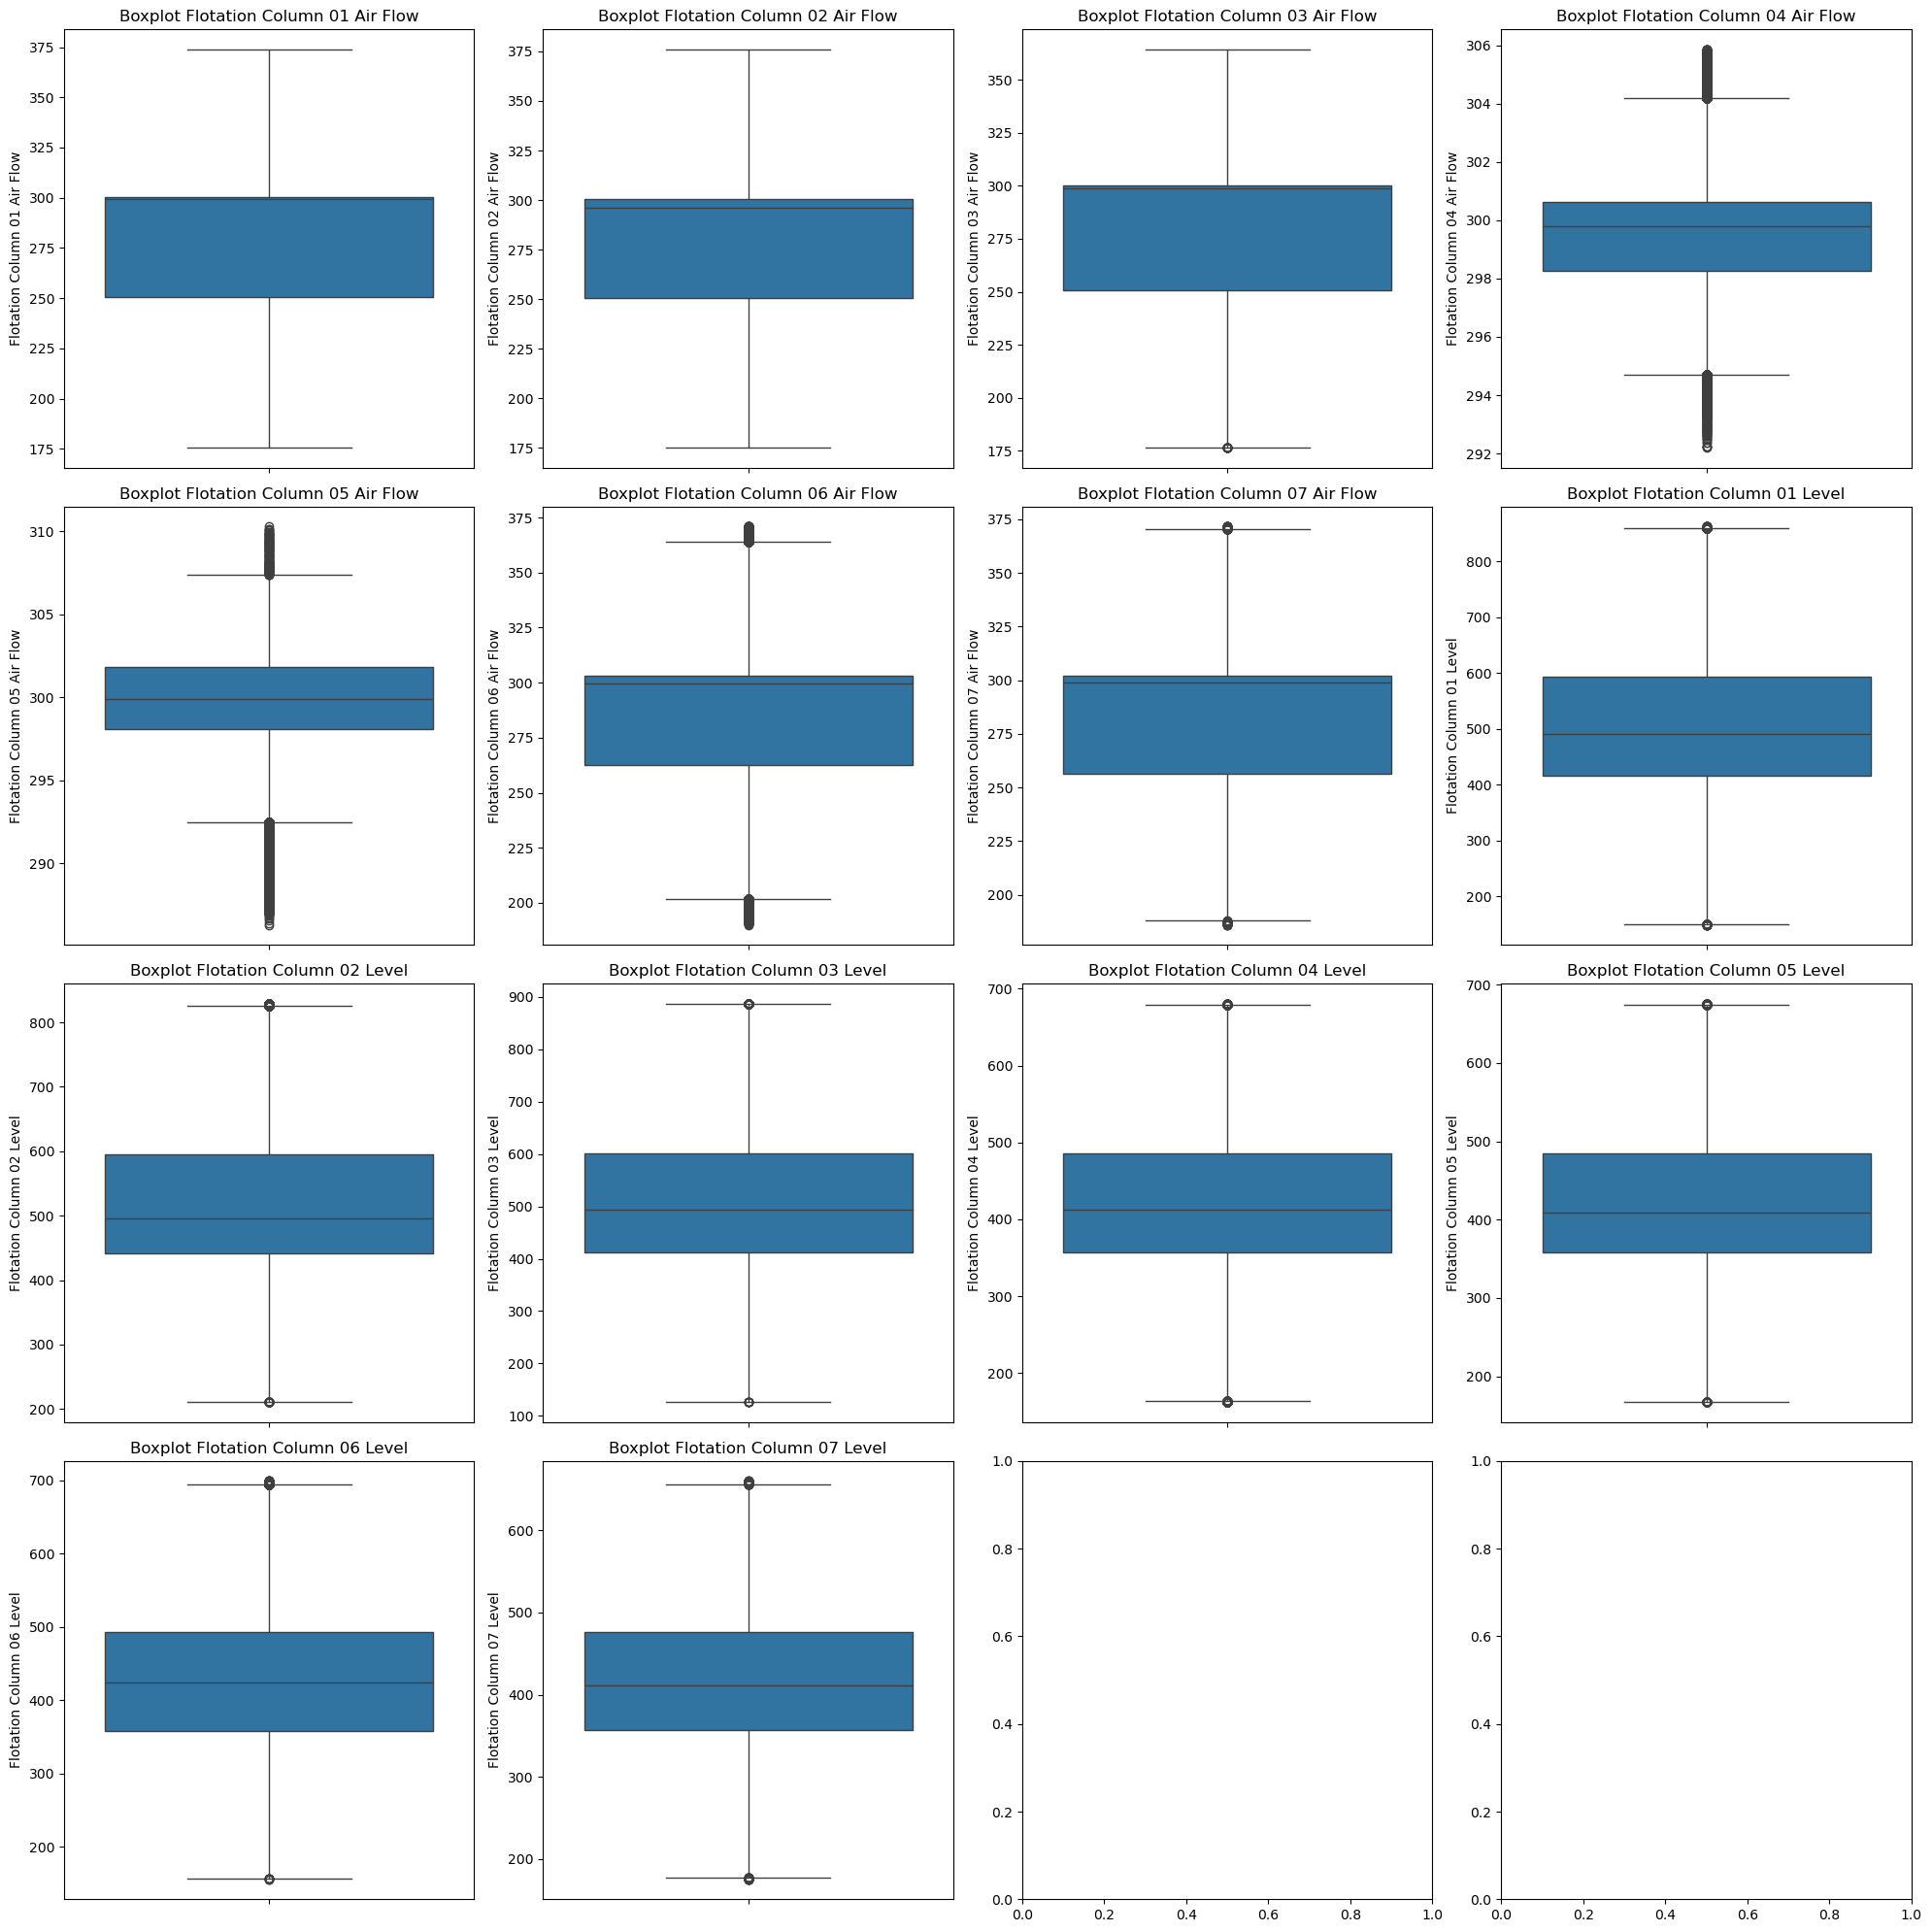

In [26]:
cols_plot = df.columns[7:21]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i, col in enumerate(cols_plot):
    row = i // 4  # calcular a linha do subplot
    col_idx = i % 4  # calcular a coluna do subplot
    sns.boxplot(data=df, y=col, ax=axes[row, col_idx])

    axes[row, col_idx].set_title(f'Boxplot {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()


Duas conlunas finais da qualiade das polpas em laboratório. Vemos que esses são os melhores resultados e devemos nos aproximar esse resultado.

In [10]:
df.iloc[:,22:]

,% Iron Concentrate,% Silica Concentrate
0,66.91,1.31
1,66.91,1.31
2,66.91,1.31
3,66.91,1.31
4,66.91,1.31
...,...,...
737448,64.27,1.71
737449,64.27,1.71
737450,64.27,1.71
737451,64.27,1.71


In [32]:
df.iloc[:,21:].describe()

,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000
mean,65.050068,2.326763
std,1.118645,1.125554
min,62.050000,0.600000
25%,64.370000,1.440000
50%,65.210000,2.000000
75%,65.860000,3.010000
max,68.010000,5.530000


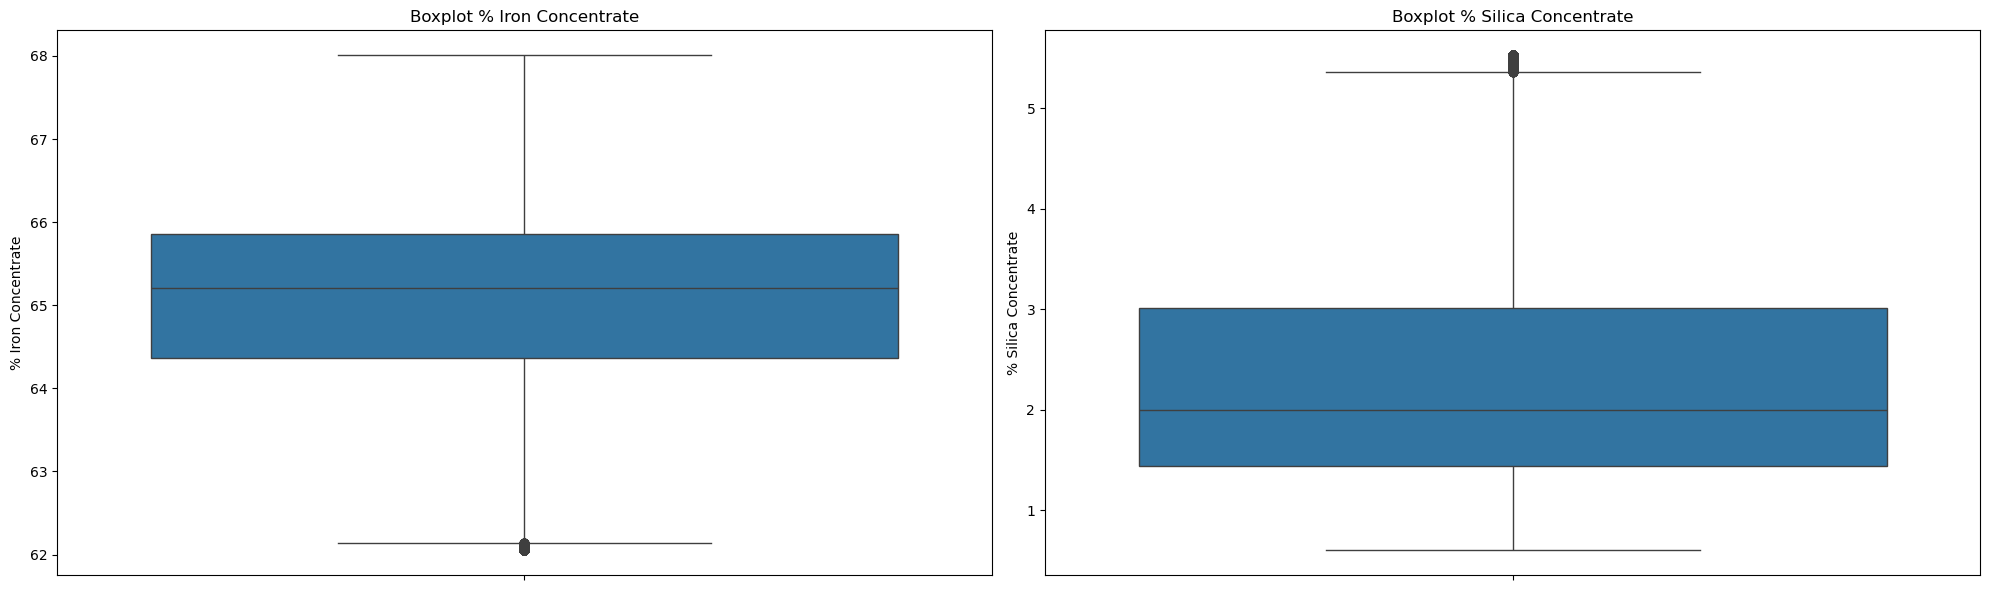

In [30]:
cols_plot = df.columns[21:]

fig, axes = plt.subplots(nrows=1, ncols=len(cols_plot), figsize=(20,6))

for i, col in enumerate(cols_plot):
    sns.boxplot(data=df,y=col,ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()




# Entendimento do Processo de Flotação

No processo de flotação, 
1) o minério de **ferro** contendo impurezas (principalmente **sílica**) é colocado em uma máquina para separação. 

2) O processo consiste em, o ferro é inserido no maquinário junto com as impurezas, são adcionados à água dois reagentes a Amina e o Amido. 

3) Após a reação do ferro com a amina e da silica no amido, um reagente espumante, cria bolhas junto ao ar que é inserido no fundo da máquina e faz com que o ferro suba a superficie através do empuxo e a silica desca para o fundo pois se torna mais pesada. As "bolhas" de ferro são armazenadas assim como a silica. 

4) Beneficio: Diferente dos processos antigos onde se separava direto no forno, e tem uma perda de finos mineiros, hoje com as praticas sustentaveis e diminuição de emissao de co2 é usado o processo de flotação onde se aproveita quase todo o mineiro.

## Etapas do Processo

1. **Amina**: 
   - Um composto químico utilizado para reagir com as partículas de ferro, tornando-as **hidrofóbicas** (repelentes à água). Esse tratamento, junto com o fluxo de ar que entra pelo fundo do recipiente, ajuda o ferro a emergir e ser separado na superfície.
   
2. **Amido (Starch)**: 
   - Atua sobre a **sílica**, tornando-a **hidrofílica** (atrai água), fazendo com que as partículas de sílica absorvam água mais facilmente e permaneçam no fundo do recipiente, permitindo sua separação do ferro. Também é chamado de depressor

**Pergunta: Qual Agente Espumante é Usado? E se ele interfere na pureza final do ferro**
Os outliers observados no boxplot pode se referir ao uso desse angente




In [11]:
df_noDate = df.drop(['date'],axis=1)


## Variaveis
#### Quais variaveis vão impactar na purificação do ferro e na diminuição da silica, visto de um olhar teorico

A quantidade de reagente (Amido e Amina) pode interferir na pureza do minerio ao final

Starch Flow | Amina Flow




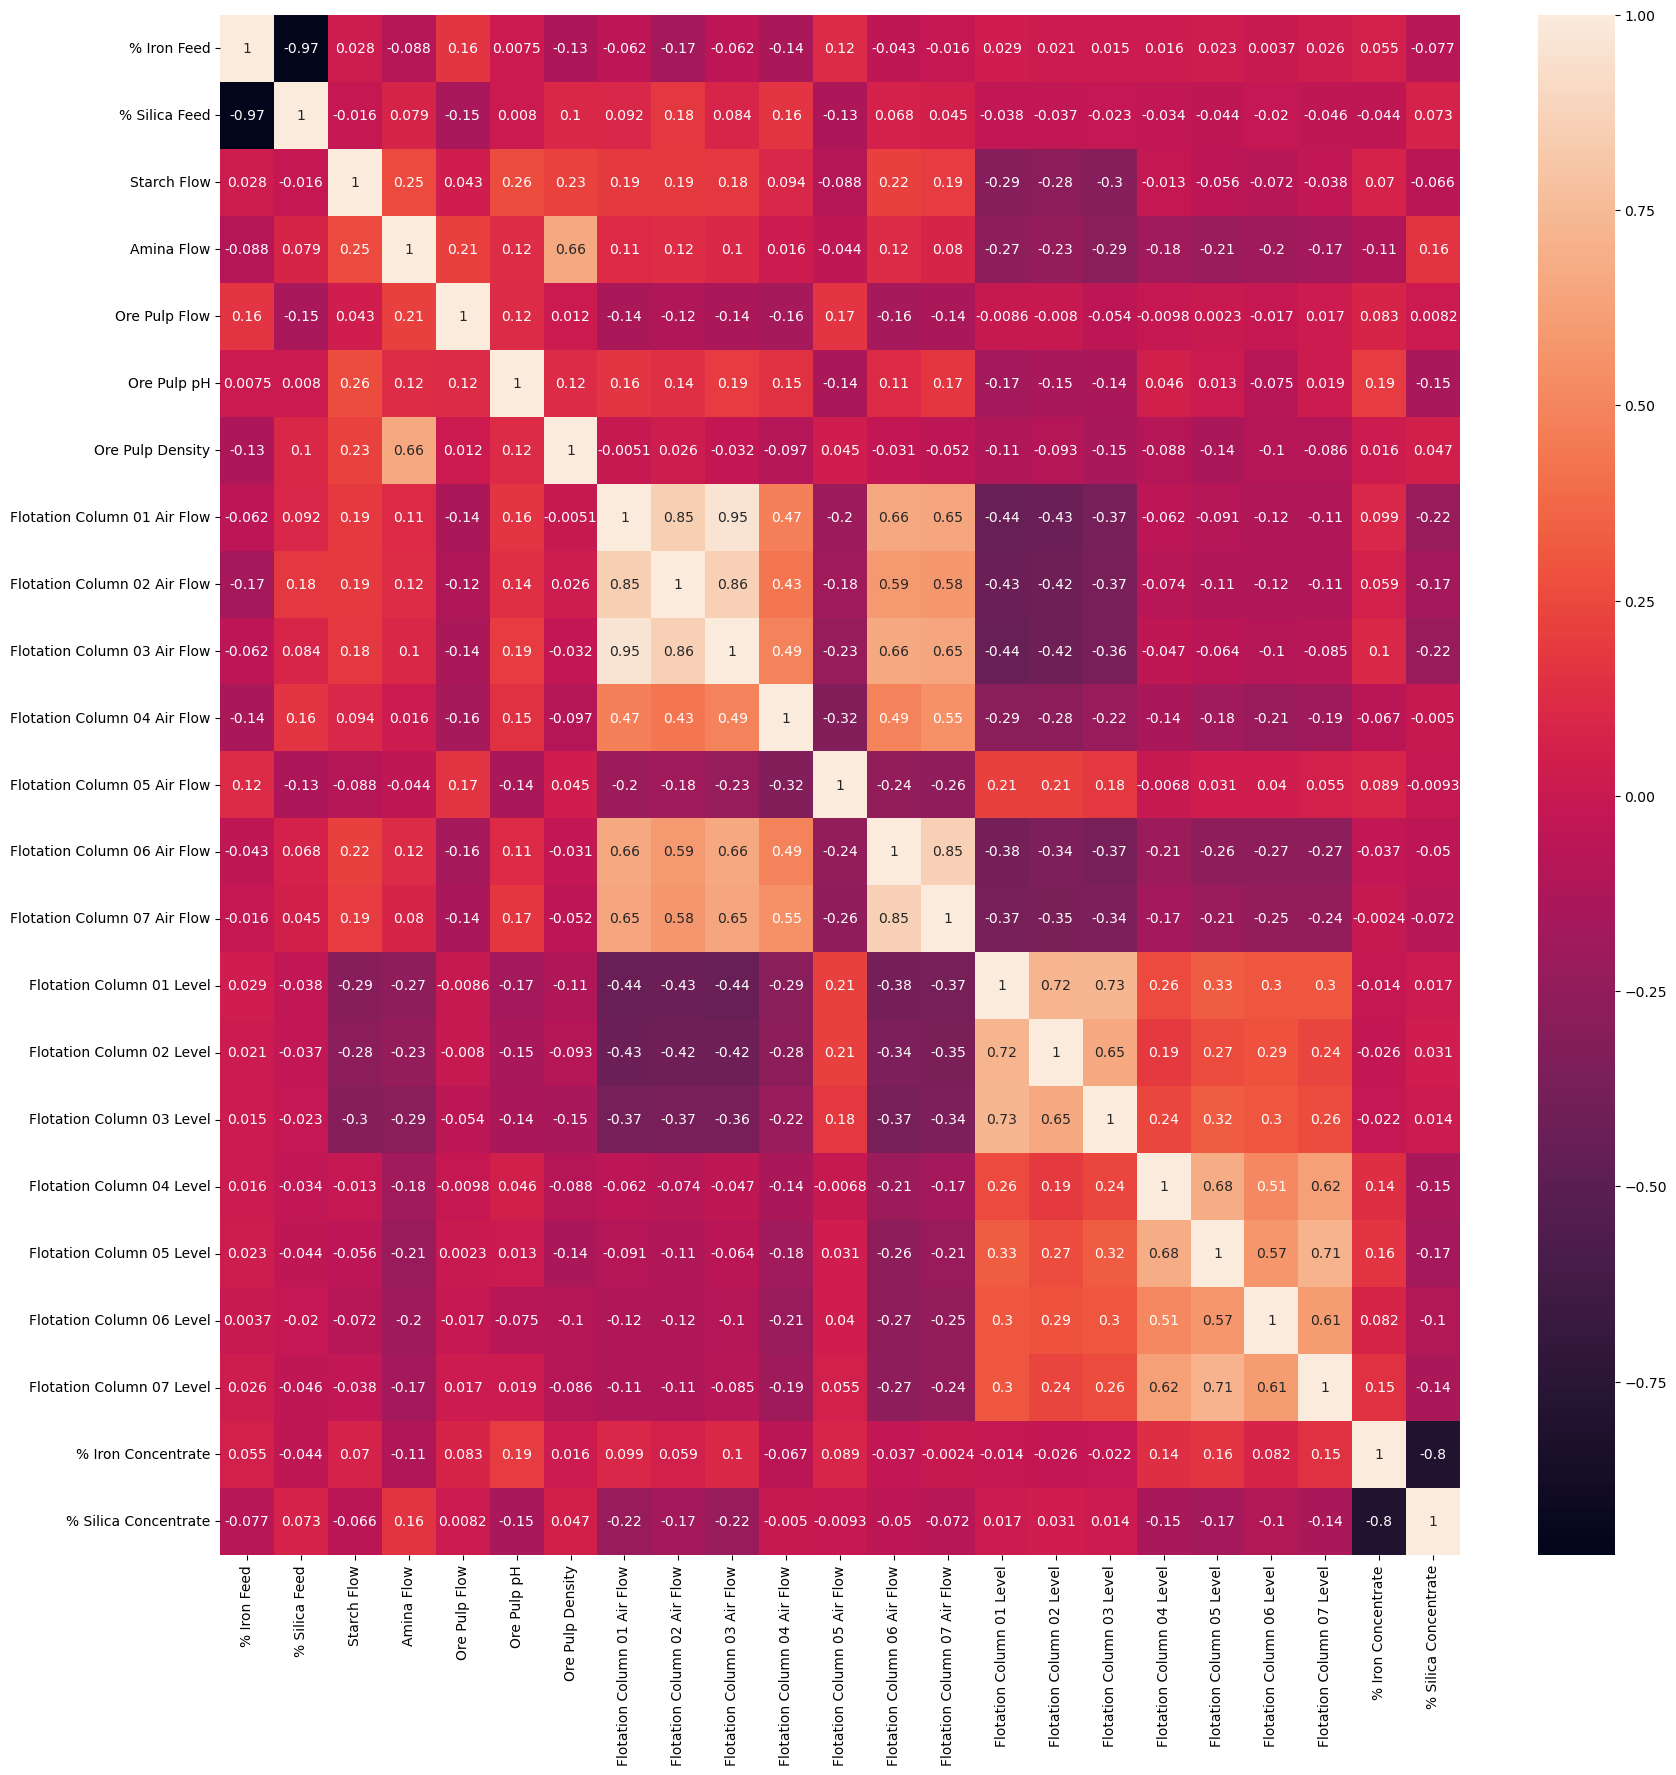

In [12]:

plt.figure(figsize=(20,20))
sns.heatmap(df_noDate.corr(), annot=True)
plt.show()


# Relação entre as colunas

Colunas de Flotation level e ar estão altamente correlacioandas
### Iron Concentrate x Silica concentrate 
Estão inversamente correlacionadas, quando mais ferro concentrado menos silica 
### Ore pulp Density x Amina Flow
A densidade aumenta com o uso de amina

### Silica concentrate x Amina Flow x Ore pulp Ph x Air flow(1-2-3)
Existe uma relacao não muito grande, porém importante. 

In [13]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

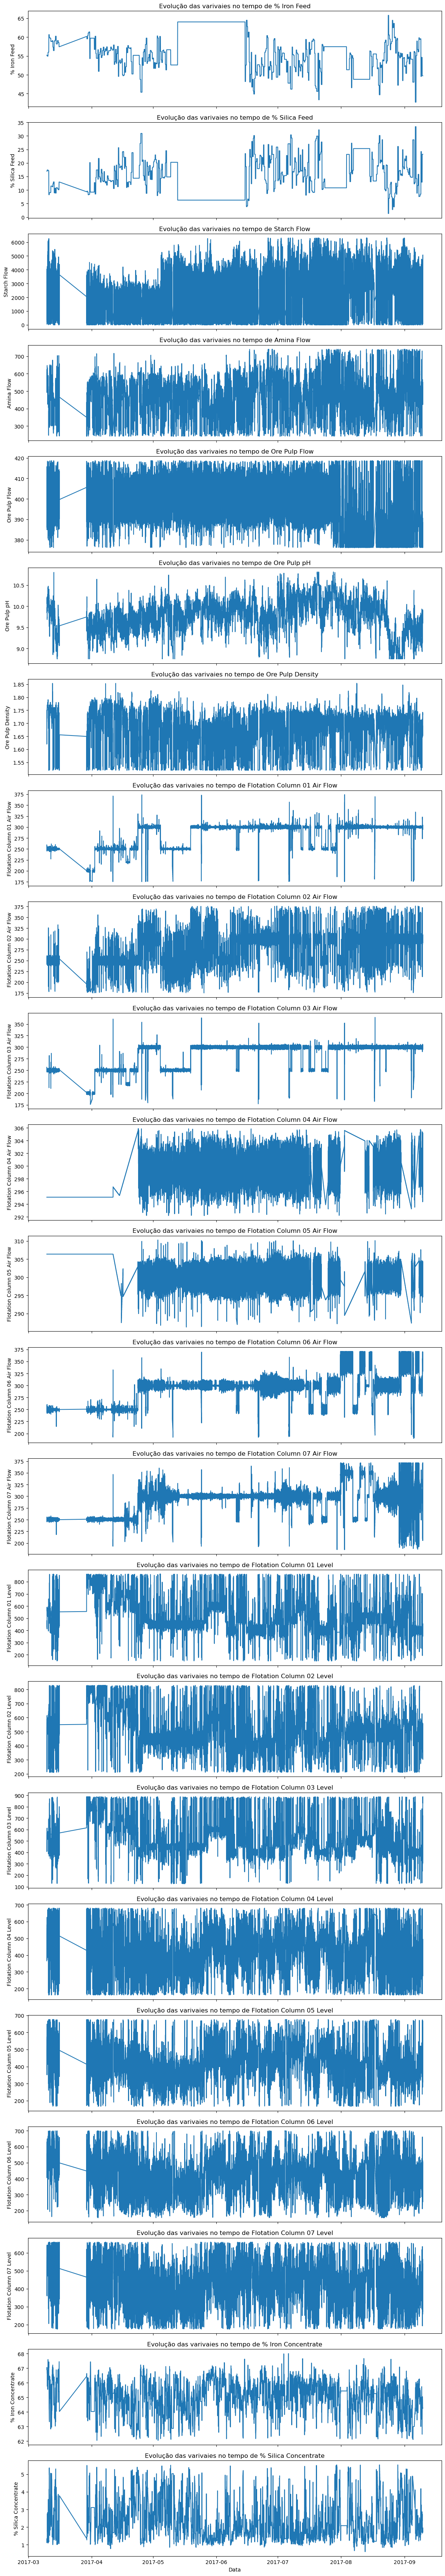

In [14]:
num_cols = len(df.columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12,3*num_cols), sharex=True)

for i, col in enumerate(df.columns):
    axes[i].plot(df.index, df[col])
    axes[i].set_title(f"Evolução das varivaies no tempo de {col}")
    axes[i].set_ylabel(col)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

In [27]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


### Implementando um modelo de machine learning

Separação dos dados

25% para teste e 75% treino

25% de len(rowls) = 184.365
75% de len(rowls) = 553.089

minimo de concentração de silica 4%
baseado no percentil de da concentração 75%	3.010000


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
#copia do database para testes

df_ml = df

df_ml['Pred Silica'] = (df_ml['% Silica Concentrate'] > 4.0).astype(int)

train, test = train_test_split(df_ml, test_size=len(df_ml)*0.25, train_size=len(df_ml)*0.75, random_state=42)

#colunas importantes descritas na analise quantitativa

cols_features = ['% Siica Feed', 'Amina Flow', 'Ore Pulp Ph', 'Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']

X = df_ml[cols_features]
y = df_ml['Pred Silica']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

#construtor scanler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_test_scaler, y_train)

ValueError: test_size=737453 should be either positive and smaller than the number of samples 737453 or a float in the (0, 1) range